In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
path = '/content/drive/MyDrive/Midterm-Project/flights-2018-2019.csv'
flights = pd.read_csv(path)

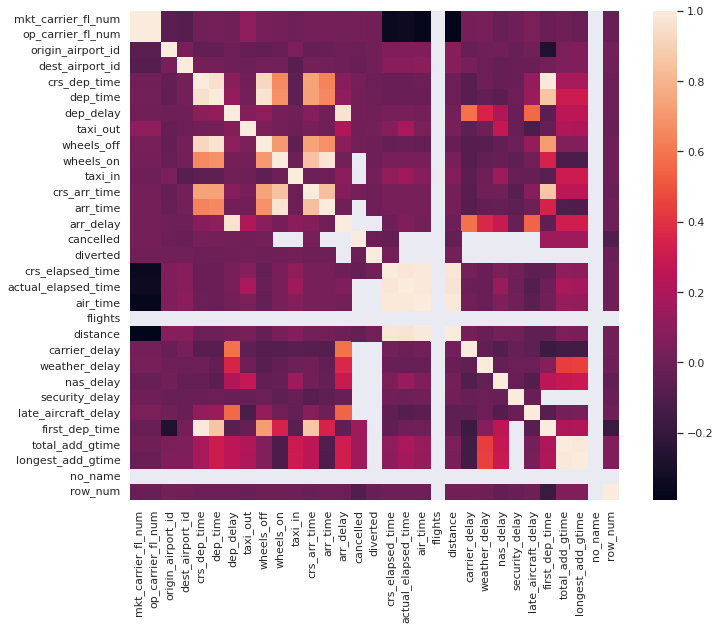

In [48]:
corrmat = flights.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True)
plt.show()

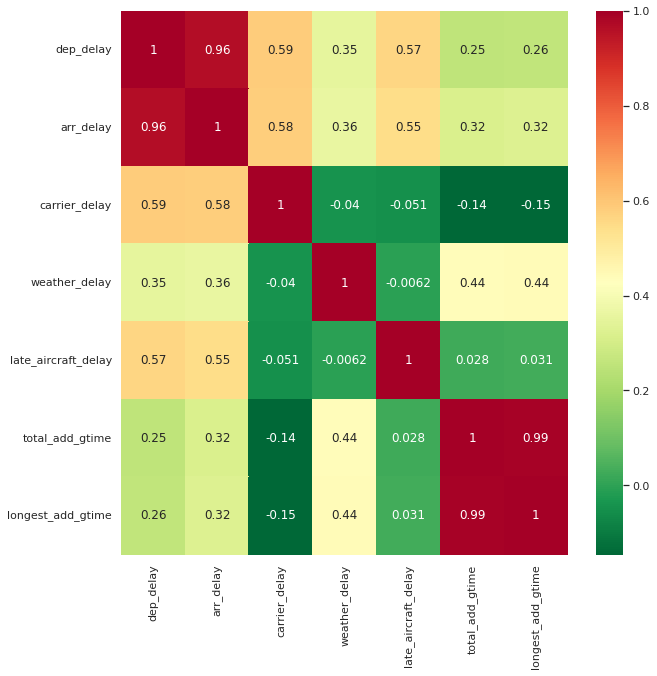

In [63]:
# Most correlated features with arr_delay 

top_corr_features = corrmat.index[abs(corrmat["arr_delay"])>0.3] # Change threshold to get wanted correlation
plt.figure(figsize=(10,10))
g = sns.heatmap(flights[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")



In [ ]:
#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [49]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    """This function takes a list of sample (arrival delay airplanes) and 
    sorts them from lowest to highest. It returns a set of (x,y) pairs that represent 
    the delay in minutes and the relative position in the sorted list, or percentile, of each reading."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [50]:
x, y = ecdf(flights['arr_delay'])
"""generate 10,000 rows data that follow a normal distribution 
using the mean and the standard deviation of our dataset to scale the range."""
samples = np.random.normal(np.mean(flights['arr_delay']), np.std(flights['arr_delay']), size=10000)
x_theor, y_theor = ecdf(samples)

"These theoretical examples represent how the data would look if we had \n10,000 samples and the distribution of the readings were perfectly normal. \nIt's a hypothetical we can use to compare reality."

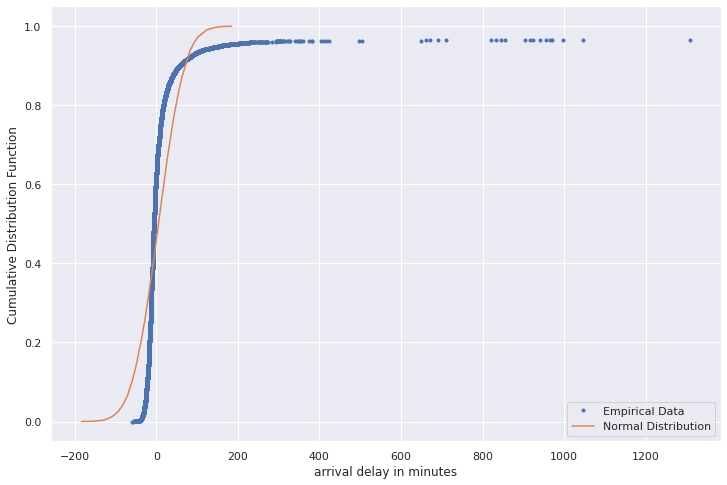

In [51]:
plt.figure(figsize=(12,8))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("arrival delay in minutes")
plt.ylabel("Cumulative Distribution Function")
#plt.figure(figsize=(12,8))
plt.plot(x_theor, y_theor)
plt.legend(('Empirical Data','Normal Distribution'), loc='lower right')

"""These theoretical examples represent how the data would look if we had 
10,000 samples and the distribution of the readings were perfectly normal. 
It's a hypothetical we can use to compare reality."""

In [52]:
from random import sample
from itertools import filterfalse
from math import isnan
from scipy.stats import kstest

norm_test_sample = sample(sorted(flights['arr_delay']), 1000)
norm_test_sample = list(filterfalse(isnan, norm_test_sample))

stat, p = kstest(norm_test_sample, "norm") ##p is really small almost equa 0

In [53]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.600, p=0.000
Sample does not look Gaussian (reject H0)


In [54]:
flights['arr_delay'].describe()

count    14089.000000
mean         5.181844
std         51.216730
min        -60.000000
25%        -15.000000
50%         -6.000000
75%          8.000000
max       1309.000000
Name: arr_delay, dtype: float64

In [ ]:
#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [55]:
month_flights = pd.DataFrame(flights[['arr_delay', 'fl_date']])
month_flights['month'] = pd.to_datetime(flights['fl_date']).dt.to_period('M')
month_flights['month'] = month_flights['month'].astype(str)
average_delay_permonth = month_flights.groupby('month').mean().reset_index()

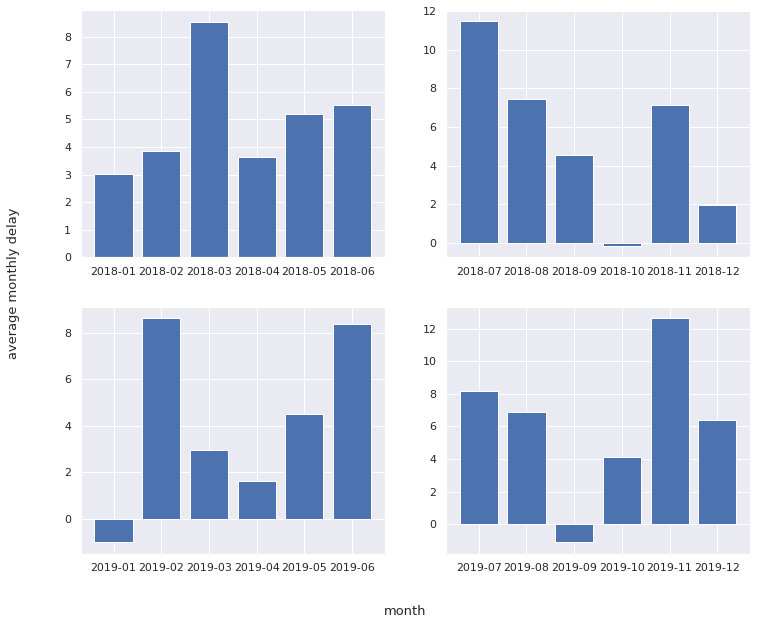

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].bar(average_delay_permonth['month'][0:6], average_delay_permonth['arr_delay'][0:6])


ax[0, 1].bar(average_delay_permonth['month'][6:12], average_delay_permonth['arr_delay'][6:12])


ax[1, 0].bar(average_delay_permonth['month'][12:18], average_delay_permonth['arr_delay'][12:18])


ax[1, 1].bar(average_delay_permonth['month'][18:24], average_delay_permonth['arr_delay'][18:24])

fig.text(0.5, 0.04, 'month', ha='center',fontsize=13)
fig.text(0.04, 0.5, 'average monthly delay', va='center', fontsize=13, rotation='vertical')
plt.show()

In [ ]:
#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

SyntaxError: ignored

In [57]:
origin_cities = flights[['fl_date', 'origin_city_name']]
dest_cities = flights[['fl_date', 'dest_city_name']]

origin_cities = origin_cities.groupby(['fl_date', 'origin_city_name']).sum().reset_index()
dest_cities = dest_cities.groupby(['fl_date', 'dest_city_name']).sum().reset_index()

dates = sorted(list(set(flights['fl_date'])))

In [59]:
dict_cities = {date:[] for date in dates}

for index, data in enumerate(origin_cities.values):
    dict_cities[data[0]].append(data[1])

for index, data in enumerate(dest_cities.values):
    dict_cities[data[0]].append(data[1])

dict_len = 0
for date, cities in dict_cities.items():
    dict_len += len(cities)

In [60]:
"""
getting the cities of airports and dates
"""

#origin_cities = flights['origin_city_name']
#dest_cities = flights['dest_city_name']
#cities_l = list(set(list(origin_cities) + list(dest_cities)))

"""
create empty dataframe with nan values = len of origin_cities and dest cities df
"""

#dates = sorted(list(set(flights['fl_date'])))
#city = "Los Angeles, CA" #choose the representative city

cities_weather = pd.DataFrame(columns=['date', 'city', 'condition'], index=range(dict_len))

def write_csv(df, name):
    """
    - make a csv file if not exit with data file and name
    
    - df.to_csv('origin_cities.csv', index=False)
    """
    return df.to_csv(name, index=False)

def weather_f(dict_cities,df_weather, apikey, csv_name):
    
    """
    - send requests to weatherapis to get weather conditions
       according to locations and dates params
    
    - write csv file df_weather, include date, city, condition
    """
    
    import requests
    import json
    
    
    index = 0

    for date, cities in dict_cities.items():
        for city in cities:       
            url = f'http://api.weatherapi.com/v1/history.json?key={apikey}&q={city}&dt={date}'
            res = requests.get(url)
            res = res.json()
            condition = res['forecast']['forecastday'][0]['day']['condition']['text']
            df_weather.iloc[index] = [date, city, condition]
            index += 1
            
    #return df_weather
    return write_csv(df_weather, csv_name)
    


In [61]:
weather_f(dict_cities,cities_weather, apikey, 'weather_2018_2019.csv')

JSONDecodeError: ignored